In [61]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [62]:
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/22/1487764270.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/22/1487764729.h5'
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/22/1487765418.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/22/1487765991.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/22/1487767044.h5'

In [63]:
h = katdal.open(filename)

In [64]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2017/02/22/1487765418.h5 (version 3.0)
Observer: Moloko  Experiment ID: 20170222-0020
Description: 'Generic AR1 phaseup'
Observed from 2017-02-22 14:10:31.952 SAST to 2017-02-22 14:16:31.799 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m001,m003,m006,m010,m014,m025,m031,m034,m062  18      180
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M32k  1284.000         856.000          32768        26.123
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m003', 'm001', 'm014', 'm006', 'm062', 'm010', 'm034', 'm025', 'm031']
  spw=0
-------------------------------------------------------------------------------
Shape: (90 dumps, 32768 channels, 180 correlation products) => Size: 4.247 GB
An

In [65]:
# check what dynamic Telescope state keys we have
print h.file['TelescopeState'].keys()

[u'cbf_eq_coef_m006h', u'm025_rsc_rxs_serial_number', u'cbf_eq_coef_m003h', u'm062_activity', u'cal_preferred_refants', u'data_target', u'm062_rsc_rxl_serial_number', u'm031_rsc_rxl_serial_number', u'm001_pos_request_scan_elev', u'cal_param_kcross_chanave', u'cbf_eq_coef_d001h', u'm025_pos_request_scan_elev', u'm025_rsc_rxl_serial_number', u'anc_wind_direction', u'm025_pos_request_scan_azim', u'cbf_eq_coef_d003v', u'm034_ap_tilt_corr_azim', u'cbf_eq_coef_d006h', u'm025_pos_actual_scan_elev', u'm010_observer', u'm006_rsc_rxs_serial_number', u'cal_param_k_echan', u'm006_pos_actual_scan_elev', u'm006_rsc_rxx_serial_number', u'm062_rsc_rxu_serial_number', u'm001_ap_tilt_corr_elev', u'm003_dig_noise_diode', u'm014_pos_request_scan_elev', u'm003_rsc_rxu_serial_number', u'm010_ap_point_error_tiltmeter_enabled', u'cbf_eq_coef_m025h', u'm010_dig_noise_diode', u'cal_param_g_echan', u'cal_bls_ordering', u'm003_pos_request_scan_elev', u'm014_pos_request_scan_azim', u'm025_observer', u'cal_pol_orde

In [66]:
print h.file['TelescopeState']['cal_obs_end_time'][0][0]

1487764600.55


In [67]:
print h.file['TelescopeState']['m025_pos_request_scan_elev'][0][1]

F43.596352981599999
.


In [68]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_K  ---  5
    cal_product_G  ---  11


In [69]:
np.set_printoptions(precision=4,suppress=True)

In [70]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V123">
[['m001', 'm003', 'm006', 'm010', 'm014', 'm025', 'm031', 'm034', 'm062']]
['m001' 'm003' 'm006' 'm010' 'm014' 'm025' 'm031' 'm034' 'm062']


# Delays

In [71]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [72]:
k_array.shape #Times,Pols,Antennas

(5, 2, 9)

In [73]:
# print delays (if there are few delays)
print 'POL 0: ', k_0
print 'POL 1: ', k_1

POL 0:  [[ 27.9937 -32.7585 -27.923   -0.      -4.6721   9.3785  18.6853  13.909
  -18.7912]
 [  0.0243   0.0047   0.0167  -0.      -0.0022   0.0091  -0.0104   0.0098
   -0.0016]
 [ 27.9954 -32.763  -27.9396  -0.      -4.6717   9.3733  18.6562  13.9079
  -18.8563]
 [  0.0376   0.0293   0.0457   0.       0.0023   0.0374   0.0281   0.0213
    0.0359]
 [ 28.0275 -32.7212 -27.9173   0.      -4.6835   9.4278  18.6837  13.937
  -18.7818]]
POL 1:  [[ 27.9852 -32.7035 -27.9935   0.      -4.7253   9.3806  18.72    13.8233
  -18.7439]
 [  0.032    0.0094   0.0176   0.       0.0035   0.0138  -0.0077  -0.0182
    0.0035]
 [ 27.9876 -32.7026 -28.0084   0.      -4.7274   9.3814  18.6943  13.8146
  -18.7994]
 [  0.0411   0.031    0.0418   0.       0.0085   0.0306   0.0326  -0.0013
    0.0314]
 [ 28.0277 -32.6658 -27.9738  -0.      -4.7242   9.4382  18.7215  13.8015
  -18.7322]]


In [74]:
print labels

['m001' 'm003' 'm006' 'm010' 'm014' 'm025' 'm031' 'm034' 'm062']


In [75]:
k_0[:,0]

array([ 27.9937,   0.0243,  27.9954,   0.0376,  28.0275])

In [76]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

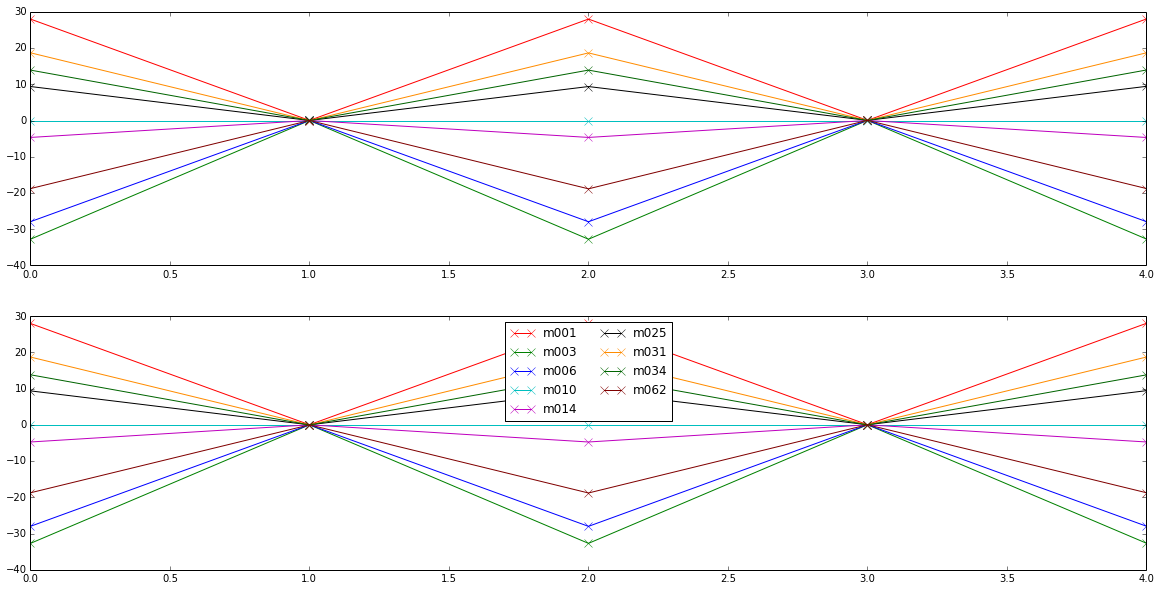

In [90]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(k_array.shape[2]):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center',ncol=2)

# Gains

In [78]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(11, 2, 9)


In [79]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 5.8196  8.406   7.4323  5.8881  6.2691  6.1969  8.38    7.1255  6.7253]
[ 7.3521  5.8215  7.6467  6.405   6.1668  6.3211  5.8481  6.0441  8.4043]


In [80]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 5.8299  8.4234  7.4479  5.8832  6.258   6.2097  8.4071  7.0192  6.7213]
[ 7.3498  5.8245  7.6209  6.3892  6.1309  6.3376  5.8576  5.9756  8.3888]


In [81]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 1.0018  1.0021  1.0021  0.9992  0.9982  1.0021  1.0032  0.9851  0.9994]
[ 0.9997  1.0005  0.9966  0.9975  0.9942  1.0026  1.0016  0.9887  0.9982]


In [82]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[  4.0518  37.2182  -0.5147   0.       6.4613 -65.7218 -29.5279 -55.5558
 -52.3325]
[ 27.678   11.543   -6.8157   0.      46.723  -43.5127 -55.2827 -27.0666
  36.2537]


In [83]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[ -2.2338  29.1829  -0.432    0.       7.3868 -73.9948 -22.8685 -67.4122
 -53.8494]
[ 17.057    3.1809 -13.6325  -0.      41.4153 -55.953  -50.3603 -14.7732
  33.4975]


In [84]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[ -6.2856  -8.0352   0.0826   0.       0.9255  -8.273    6.6593 -11.8564
  -1.5169]
[-10.621   -8.3621  -6.8168  -0.      -5.3077 -12.4403   4.9224  12.2934
  -2.7562]


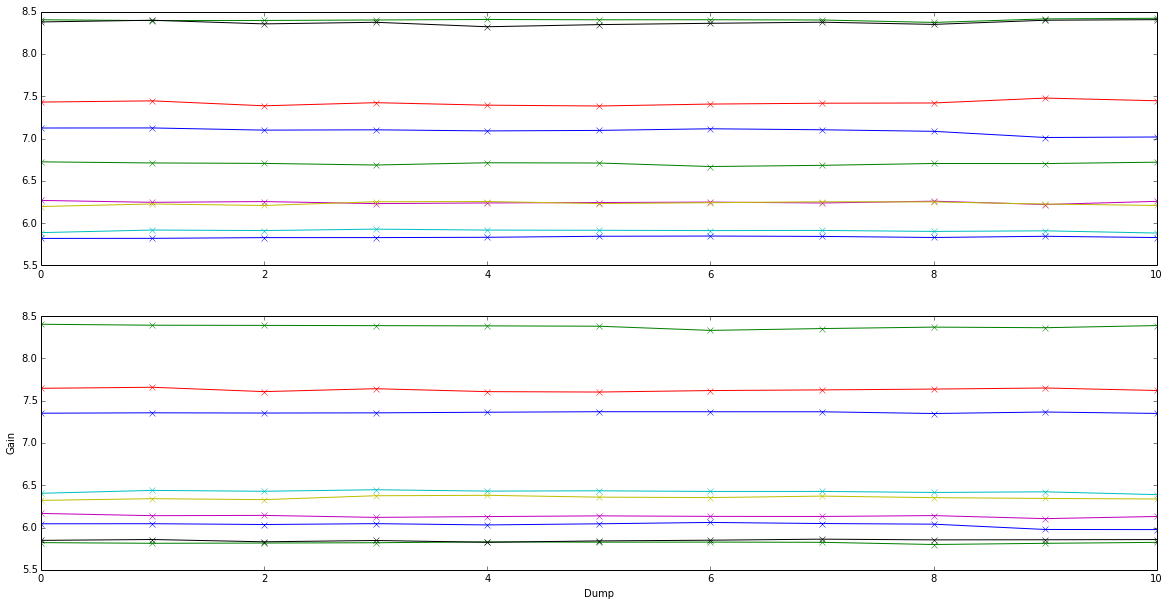

In [85]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
#plt.legend()

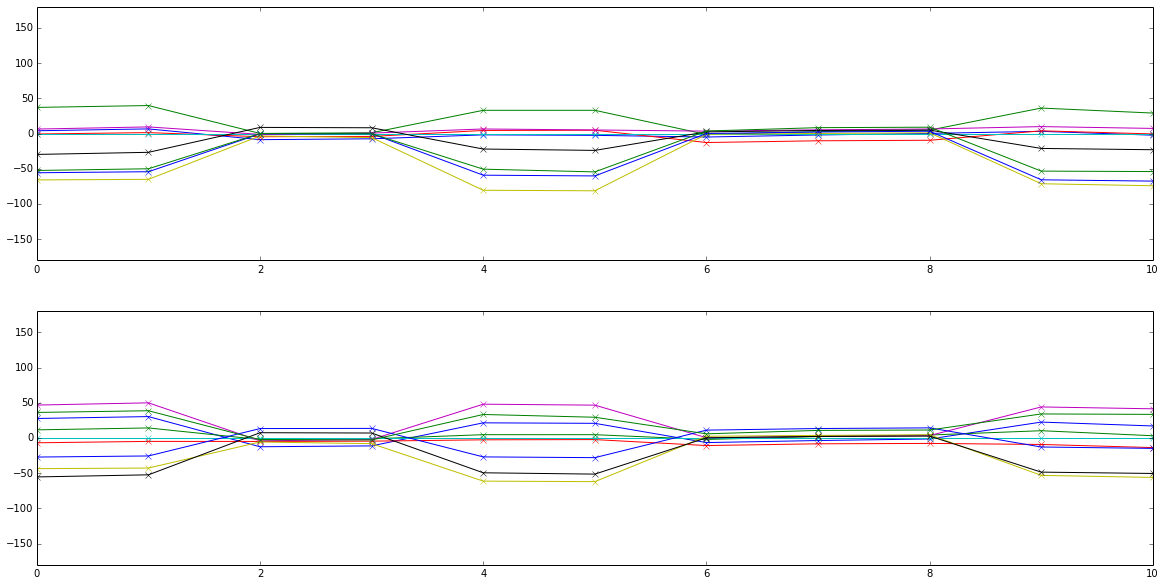

In [86]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

In [87]:
print  h.file['TelescopeState']['cal_param_g_bchan'][0][1]
print  h.file['TelescopeState']['cal_param_g_echan'][0][1]

print  h.file['TelescopeState']['cal_param_k_bchan'][0][1]
print  h.file['TelescopeState']['cal_param_k_echan'][0][1]

I17400
.
I21400
.
I17400
.
I21400
.


In [88]:
def freq(chan):
    bw=856.
    f=bw*chan/32768. +bw
    return(f)
    

In [89]:
print freq(17400), freq(21400)

1310.54101562 1415.03320312
